# 사이킷런으로 시작하는 머신러닝

## 사이킷런 소개와 특징
1. 파이썬 기반의 다른 머신러닝 패키지도 시이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API 제공
2. 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공
3. 매우 많은 환경에서 사용되는 성숙한 라이브러리

## 설치 방법
아나콘다 Prompt -> pip install scikit-learn==1.0.2  
※윈도우 10환경은 아나콘타 Prompt 생성 시 마우스 오른쪽 버튼을 클릭해 '자세히 -> 관리자 권한으로 실행'

In [8]:
import sklearn
print(sklearn.__version__)

0.24.2


## 사이킷런 설치 에러  
에러 : [Winerror 5] 액세스가 거부되었습니다.
해결방법
1. 명령프롬프트 -> 관리자 권한으로 실행
2. 명령어 "python -m pip install --upgrade pip
3. cmd -> "pip install scikit-learn == 1.0.2

# 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기
붓꽃 데이터 세트 : 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것.
1. sklearn.datasets 내의 모듈 : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임.    .
2. sklearn.tree 내의 모듈 : 트리 기반 ML 알고리즘을 구현한 클래스의 모임.
3. sklearn.model_selection  
   1)학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리  
   2)최적의 하이퍼 파라미터로 평가하기 위해 직접 입력하는 파라미터들을 통칭  
   3)하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.

In [9]:
from sklearn.datasets import load_iris  #load_iris() : 붓꽃 데이터 세트를 생성
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split #train_test_split() : 데이터를 학습 데이터와 테스트 데이터로 분리

In [11]:
import  pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

#iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값 : ', iris_label)
print('iris target명 : ', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df.head(3)

iris target값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size=0.2, random_state=11)
#train_test_split()을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 쉽게 분할
#첫 번째 파라미터 iris_data는 피처 데이터 세트
#두 번째 파라미터 : iris_label은 레이블 데이터 세트
# test_size=0.2는 전체 데이터 세트 중 테스트 데이터 세트의 비율(테스트 데이터 20%, 학습 데이터 80%)
#random_state는 호출할 때마다 가은 학습/테스트 용 데이터 세트를 생성하기 위해 주어진느 난수 발생 값
#train_test_split()은 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다.
#X_train : 학습용 피처 데이터 세트
#X_test : 테스트용 피처 데이터 세트
#Y_train : 학습용 레이블 데이터 세트
#Y_test : 테스트용 레이블 데이터 세트

- 학습용 데이터와 데스트용 데이터 분리  
train_test_split()을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 쉽게 분할  
첫 번째 파라미터 iris_data는 피처 데이터 세트  
두 번째 파라미터 : iris_label은 레이블 데이터 세트  
test_size=0.2 : 전체 데이터 세트 중 테스트 데이터 세트의 비율(테스트 데이터 20%, 학습 데이터 80%)  
random_state : 호출할 때마다 가은 학습/테스트 용 데이터 세트를 생성하기 위해 주어진느 난수 발생 값  
train_test_split() : 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다.  
X_train : 학습용 피처 데이터 세트  
X_test : 테스트용 피처 데이터 세트  
Y_train : 학습용 레이블 데이터 세트  
Y_test : 테스트용 레이블 데이터 세트  

In [20]:
# DecisionTreeClassifier 객채 생성 (의사 결정 트리 클래스)
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test) #예측은 반드시 학습 데이터가 아닌 다른 데이터 이용

from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


- 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리합니다
- 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.
- 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측합니다.
- 평가 : 이렇게 예측된 결괏값과테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가합니다.

# 사이킷런의 기반 프레임워크 익히기

- fit() : ML 모델 학습
- predict() : 학습된 모델의 예측
- estimator 클래스(Classifier, Regressor)
- Classifier : 분류 알고리즘을 구현한 클래스
- Regressor : 회귀 알고리즘을 구현한 클래스 

## 사이킷런의 주요 모듈
1. 예제데이터  
 1) sklearn.datasets : 사이킷런에 내장되어 예쩨로 제공하는 데이터 세트
2. 피처 처리  
 1) sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공 (문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)  
 2) sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공  
 3) sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨.  
3. 피처 처리 & 차원 축소   
 1) sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능 수행  
4. 데이터 분리, 검증 & 파라미터 튜닝  
 1) sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치(grid Srach)로 최적 파라미터 추출 등의 API 제공  
5. 평가  
 1) sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법 제공  
5. ML 알고리즘  
 1) sklearn.ensemble : 앙상블 알고리즘 제공 / 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공  
 2) sklearn.linear_model : 주로 선형 회귀, 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘 지원  
 3) sklearn,naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시간 NB, 다항 분포 NB 등.  
 4) sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN 등.  
 5) sklearn.svm : 서포트 벡터 머신 알고리즘 제공.  
 6) sklearn.cluster : 비지도 클러스터링 알고리즘 제공(k-평균, 계층형, DBSCAN 등)  
6. 유틸리티  
 1) sklearn.pipelin : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공.  

## 내장된 예제 데이터 세트
 1. 분류나 회귀 연습용 예제 데이터  
  1) datasets.load_boston() : 회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트  
  2) datasets.load_breast_cancer() : 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트  
  3) datasets.load_diabetes() : 회귀 용도이며, 당뇨 데이터 세트  
  4) datasets.load_digits() : 분류 용도이며, 0~9까지 숫자의 이미지 픽셀 데이터 세트  
  5) datasets.load_iris() : 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트    

2. fetch 계열의 명령   
  1) fetch_covtype() : 회귀 분석용 토지 조사 자료  
  2) fetch_20newsgroups() : 뉴스 그룹 텍스트 자료  
  3) fetch_olivetti_faces() :  얼굴 이미지 자료  
  4) fetch_lfw_people() : 얼굴 이미지 자료  
  5) fetch_lfw_pairs() : 얼굴 이미지 자료  
  6) fetch_rcv1() : 로이터 뉴스 말뭉치  
  7) fetch_mldata() : ML 웹사이트에서 다운로드      
    
    
3. 분류와 클러스터링을 위한 표본 데이터 생성기  
  1) datasets.make_classifications() : 분류를 위한 데이터 세트를 만듦. 특히 높은 상관도, 불필요한 속성 등의  
      노이즈 효과를 위한 데이터를 무작위로 생성.  
  2) datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성. 군집 지정 개수에 따라 여러 가지   
      클러스터링을 위한 데이터 세트를 쉽게 만들어 줌.  
      
      
4. 분류나 회귀를 위한 연습용 예제 데이터의 구성  
 1) data : 피처의 데이터 세트
 2) target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트.  
 3) target_names : 개별 레이블의 이름.  
 4) feature_names : 피처의 이름.  
 5) DESCR : 데이터 세트에 대한 설명과 각 피처의 설명.  

In [23]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [24]:
# load_iris() 데이터 세트의 key값 확인 
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 : ', keys)

붓꽃 데이터 세트의 키들 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [27]:
print('\n featuer_name의 type : ', type(iris_data.feature_names))
print(' feature_names의 shape :', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type :', type(iris_data.target_names))
print(' target_names의 shape :', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type : ', type(iris_data.data))
print(' data의 shape :', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type : ', type(iris_data.target))
print(' target의 shape : ', iris_data.target.shape)
print(iris_data.target)


 featuer_name의 type :  <class 'list'>
 feature_names의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type : <class 'numpy.ndarray'>
 target_names의 shape : 3
['setosa' 'versicolor' 'virginica']

 data의 type :  <class 'numpy.ndarray'>
 data의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

# Model Selection 모듈 소개
- model_selection 모듈이란?   
  1) 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가  
  2) 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

## 학습/테스트 데이터 세트 분리 - train_test_split()

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
df_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
df_clf.fit(train_data, train_label)

#학습 데이터 세트로 예측 수행
pred = df_clf.predict(train_data)
print('예측 정확도 :', accuracy_score(train_label, pred))

예측 정확도 : 1.0


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                   test_size=0.3, random_state=121)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                   test_size = 0.3, random_state=121)

- train_test_split()의 특징  
1. (피처 데이터 세트, 레이블 데이터 세트, n , n)  

2. n.  
   1)test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정. 디폴트 = 0.25(25%)  
   2)train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정.  
   3)shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정. 디폴트=True.  
   4)random_state : random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. train_test_split()는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 생성.
 

In [29]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


## 교차 검증
- 특징  
  1)과적합 방지, 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편항되게 모델을 유도하는 것을 방지  
  2)데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행.

## K 폴드 교차 검증
- 특징  
 1) 가장 보편적 사용  
 2) K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행  
 3) KFold, StratifiedKFold 클래스 제공

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
df_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 : ', features.shape[0])

붓꽃 데이터 세트 크기 :  150


In [33]:
n_iter = 0

#KFold 객체의 split()을 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    #kfold.split()으로 반환된 인덱스를 이용해 학습용,검증용 테스트 데이터 추출
    X_train, X_test = features[train_index],features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    n_iter += 1
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
         .format(n_iter,accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 :  0.9


## Stratified K 폴드
- 특징  
 1) 불균형한(imbalanced) 분포도를 가진 레이블(결졍 클래스) 데이터 집합을 위한 k 폴드 방식.  
 2) K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제 해결.

In [34]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [35]:
kfold  = KFold(n_splits = 3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('#교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())

#교차 검증 : 1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64
#교차 검증 : 2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64
#교차 검증 : 3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64


In [36]:
# 폴드 세트 3개로 설정.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64


In [37]:
# StratifiedKFold를 이용해 데이터 분리.
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy=[]

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    #반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 : ', np.round(np.mean(cv_accuracy),4))


1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9667


## 교차 검증을 보다 간편하게 - cross_val_score()
- 특징  
 1) cross_val_score() API 선언형태  
 2) cross_val_score(esetimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
 3) 주요 파라미터 : estimator, X, y, scoring, cv  
 4) estimator : 사이킷런의 분류 알고리즘 클래스인 CLassifier 또는 회귀 알고리즘 클래스인 Regressor를 의미  
 5) X : 피처 데이터 세트  
 6) y : 레이블 데이터 세트  
 7) scoring : 예측 성능 평가 지표  
 8) cv : 교차 검증 폴드 수  
 9) 폴드 세트 설정, for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출, 반복 학습/예측 수행하고 예측 성능 반환을 한꺼번에 수행  

In [37]:
# cross_val_score() API 선언형태
# cross_val_score(esetimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# 주요 파라미터 : estimator, X, y, scoring, cv
#estimator : 사이킷런의 분류 알고리즘 클래스인 CLassifier 또는 회귀 알고리즘 클래스인 Regressor를 의미
# X : 피처 데이터 세트
#y : 레이블 데이터 세트
#scoring : 예측 성능 평가 지표
#cv : 교차 검증 폴드 수

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(df_clf, data, label, scoring='accuracy',cv=3)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


## GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
- 특징  
 1) estimator : classifier, regressor, pipeline이 사용 될 수 있습니다.  
 2) param_grid : key + 리스트 값을 가지는 딕셔너리가 주어집니다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.  
  3) scoring : 예측 성능을 측정할 평가 방법을 지정합니다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예:정확도의 경우'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있습니다.  
 4)  cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.  
 5) refit : 디폴트가 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다.  

In [39]:
# estimator : classifier, regressor, pipeline이 사용 될 수 있습니다.
# param_grid : key + 리스트 값을 가지는 딕셔너리가 주어집니다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.
# scoring : 예측 성능을 측정할 평가 방법을 지정합니다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예:정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있습니다.
# cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.
# refit : 디폴트가 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다.

In [40]:
grid_parameters = {'max_depth':[1,2,3],
                  'min_samples_split':[2,3]
                  }

In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [44]:
import pandas as pd

# param_grid의 하이퍼 라마티러를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
          'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [46]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [47]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


# 데이터 전처리

## 데이터 인코딩

In [53]:
#레이블 인코딩(Label encoding) : 카테고리 피처를 코드형 숫자 값으로 변환
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :', labels)
print('인코딩 클래스 : ', encoder.classes_)
print('디코딩 원본값 : ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 변환값 : [0 1 4 5 3 3 2 2]
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


## 원-핫 인코딩(One-Hot Encoding)

In [55]:
#원-핫 인코딩(OneHotEncoder) : 레이블 인코딩의 문제점 해결 
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다.
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [56]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화

In [58]:
# 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
# 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환

## StrandardScaler

In [61]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [65]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환.
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns = iris.feature_names)
print('feaure 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feaure 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler

In [68]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환.
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

In [72]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scaler로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scaler된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))

#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최대값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scaler로 test_array 데이터 변환함. 원본 5 -> 1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scaler된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.2 0.4 0.6 0.8 1. ]


In [74]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_array = scaler.transform(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Scale된 train_array 데이터 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]


# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotli inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
print('\n## 학습 데이터 정보 ## \n')
print(titanic_df.info())


## 학습 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [10]:
print(' Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [12]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [13]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

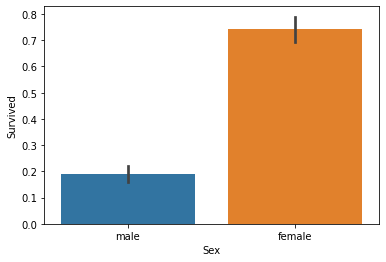

In [14]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

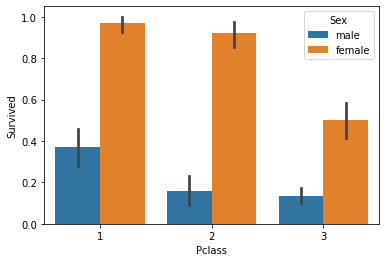

In [16]:
sns.barplot(x='Pclass', y = 'Survived', hue='Sex', data = titanic_df)

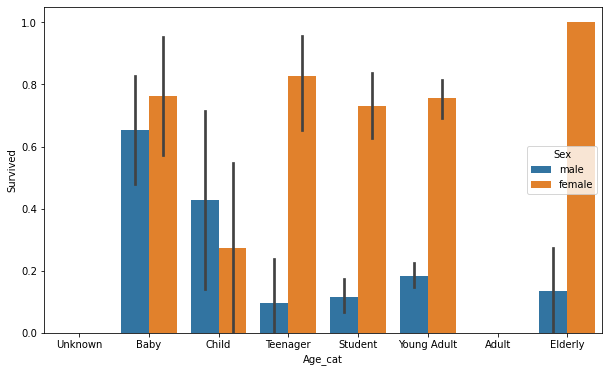

In [27]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age<= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age<=12 : cat = 'Child'
    elif age <18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <60 : cat = 'Young Adult'
    else : cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y ='Survived', hue = 'Sex', data = titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis= 1, inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [40]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['Passengerld', 'Name','Ticket'], axis= 1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin', 'Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [53]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
# p.139

NameError: name 'drop_feature' is not defined

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state=11)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
# p.140

ValueError: could not convert string to float: 'Vander Planke, Mr. Leo Edmondus'

In [3]:
from sklearn.model_selection import KFold

def exec_kfold(clf, fold=5):
    scores = []
    
    #KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.value[train_index], X_titanic_df.value[test_index]
        y_train, y_test = y_titanic_df.value[train_index], y_titanic_df.value[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

NameError: name 'dt_clf' is not defined

In [5]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(score):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

NameError: name 'dt_clf' is not defined

In [7]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_dclf.best_params)
print("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

NameError: name 'dt_clf' is not defined